Author Name: Krinal Kalpesh Akbari

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Load dataset
data = pd.read_csv('project_eda.csv')

In [ ]:
# Encode categorical features
label_encoders = {}
Cat_columns=['Indicator', 'State', 'Phase', 'Time Period Label', 'Quartile Range']
for col in Cat_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

Scaling numberical features to sam scale using MinMax Scaler

In [ ]:
# Scaling numerical features
scaler = MinMaxScaler()
numeric_columns=['Time Period', 'Value', 'LowCI', 'HighCI']
data[numeric_columns]=scaler.fit_transform(data[numeric_columns])

In [ ]:
# Stage 1: Predict Usage_Category
X_stage1 = data.drop(columns=['Group', 'Subgroup', 'Usage_Category'])
y_stage1 = data['Usage_Category']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_stage1, y_stage1, test_size=0.2, random_state=42)

Intial Model Trainning

In [ ]:
rf_stage1 = RandomForestClassifier(random_state=42)
rf_stage1.fit(X_train1, y_train1)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred1 = rf_stage1.predict(X_test1)
print("Stage 1: Usage_Category Prediction")
print(classification_report(y_test1, y_pred1))

Stage 1: Usage_Category Prediction
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       705
         Low       1.00      1.00      1.00       656
      Medium       1.00      1.00      1.00       720

    accuracy                           1.00      2081
   macro avg       1.00      1.00      1.00      2081
weighted avg       1.00      1.00      1.00      2081



In [ ]:
# Add predicted Usage_Category to the dataset
data['Predicted_Usage_Category'] = rf_stage1.predict(X_stage1)

# Encode 'Predicted_Usage_Category' column
le_usage = LabelEncoder()
data['Predicted_Usage_Category'] = le_usage.fit_transform(data['Predicted_Usage_Category'])

# Initialize and fit a LabelEncoder for 'Group' and 'Subgroup'
label_encoders['Group'] = LabelEncoder()
label_encoders['Group'].fit(data['Group'])

label_encoders['Subgroup'] = LabelEncoder()
label_encoders['Subgroup'].fit(data['Subgroup'])

# Encode Group and Subgroup
data['Group'] = label_encoders['Group'].transform(data['Group'])
data['Subgroup'] = label_encoders['Subgroup'].transform(data['Subgroup'])

# Stage 2: Predict Group using original features and Predicted_Usage_Category
X_stage2 = data.drop(columns=['Subgroup', 'Group'])
y_stage2 = data['Group']

In [ ]:
for col in X_stage2.select_dtypes(include=['object']).columns:
    if col in label_encoders:
        X_stage2[col] = label_encoders[col].transform(X_stage2[col])
    else:
        # Handle unseen labels
        le = LabelEncoder()
        X_stage2[col] = le.fit_transform(X_stage2[col])
        label_encoders[col] = le

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_stage2, y_stage2, test_size=0.2, random_state=42)

In [ ]:
rf_stage2 = RandomForestClassifier(random_state=42)
rf_stage2.fit(X_train2, y_train2)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred2 = rf_stage2.predict(X_test2)
print("Stage 2: Group Prediction")
print(classification_report(y_test2, y_pred2))

Stage 2: Group Prediction
              precision    recall  f1-score   support

           0       0.57      0.80      0.66       231
           1       0.80      0.56      0.66        43
           2       0.39      0.36      0.37       121
           3       0.54      0.42      0.47        33
           4       0.89      0.62      0.73        64
           5       0.65      0.60      0.62       146
           6       0.57      0.44      0.50        59
           7       0.75      0.65      0.70        37
           8       1.00      1.00      1.00      1318
           9       0.60      0.31      0.41        29

    accuracy                           0.85      2081
   macro avg       0.67      0.58      0.61      2081
weighted avg       0.85      0.85      0.85      2081



In [ ]:
# Add predicted Group to the dataset
data['Predicted_Group'] = rf_stage2.predict(X_stage2)

In [ ]:
# Stage 3: Predict Subgroup using original features, Predicted_Usage_Category, and Predicted_Group
X_stage3 = data.drop(columns=['Subgroup'])
y_stage3 = data['Subgroup']

In [ ]:
# Ensuring all columns in X_stage3 are numeric
for col in X_stage3.select_dtypes(include=['object']).columns:
    if col in label_encoders:
        X_stage3[col] = label_encoders[col].transform(X_stage3[col])
    else:
        # Handle unseen labels
        le = LabelEncoder()
        X_stage3[col] = le.fit_transform(X_stage3[col])
        label_encoders[col] = le

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_stage3, y_stage3, test_size=0.2, random_state=42)


In [ ]:
rf_stage3 = RandomForestClassifier(random_state=42)
rf_stage3.fit(X_train3, y_train3)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred3 = rf_stage3.predict(X_test3)
print("Stage 3: Subgroup Prediction")
print(classification_report(y_test3, y_pred3))

Stage 3: Subgroup Prediction
              precision    recall  f1-score   support

           0       0.59      0.59      0.59        27
           1       0.61      0.56      0.58        41
           2       0.47      0.47      0.47        30
           3       0.57      0.65      0.61        37
           4       0.59      0.79      0.68        33
           5       0.58      0.50      0.54        28
           6       0.83      0.69      0.75        35
           7       0.92      1.00      0.96        22
           8       0.88      0.95      0.91        22
           9       0.89      0.83      0.86        29
          10       0.86      0.89      0.88        28
          11       0.52      0.61      0.56        28
          12       0.70      0.70      0.70        10
          13       0.94      0.89      0.92        19
          14       0.73      0.89      0.80         9
          15       1.00      0.50      0.67        10
          16       0.82      0.90      0.86        3

In [ ]:
# Overall Pipeline Accuracy
correct_predictions = (
    (y_test1.values == y_pred1)
    & (y_test2.values == y_pred2)
    & (y_test3.values == y_pred3)
)
overall_accuracy = correct_predictions.sum() / len(correct_predictions)
print(f"Overall Hierarchical Prediction Accuracy: {overall_accuracy:.2f}")

Overall Hierarchical Prediction Accuracy: 0.55


Visualization of tree for better understanding

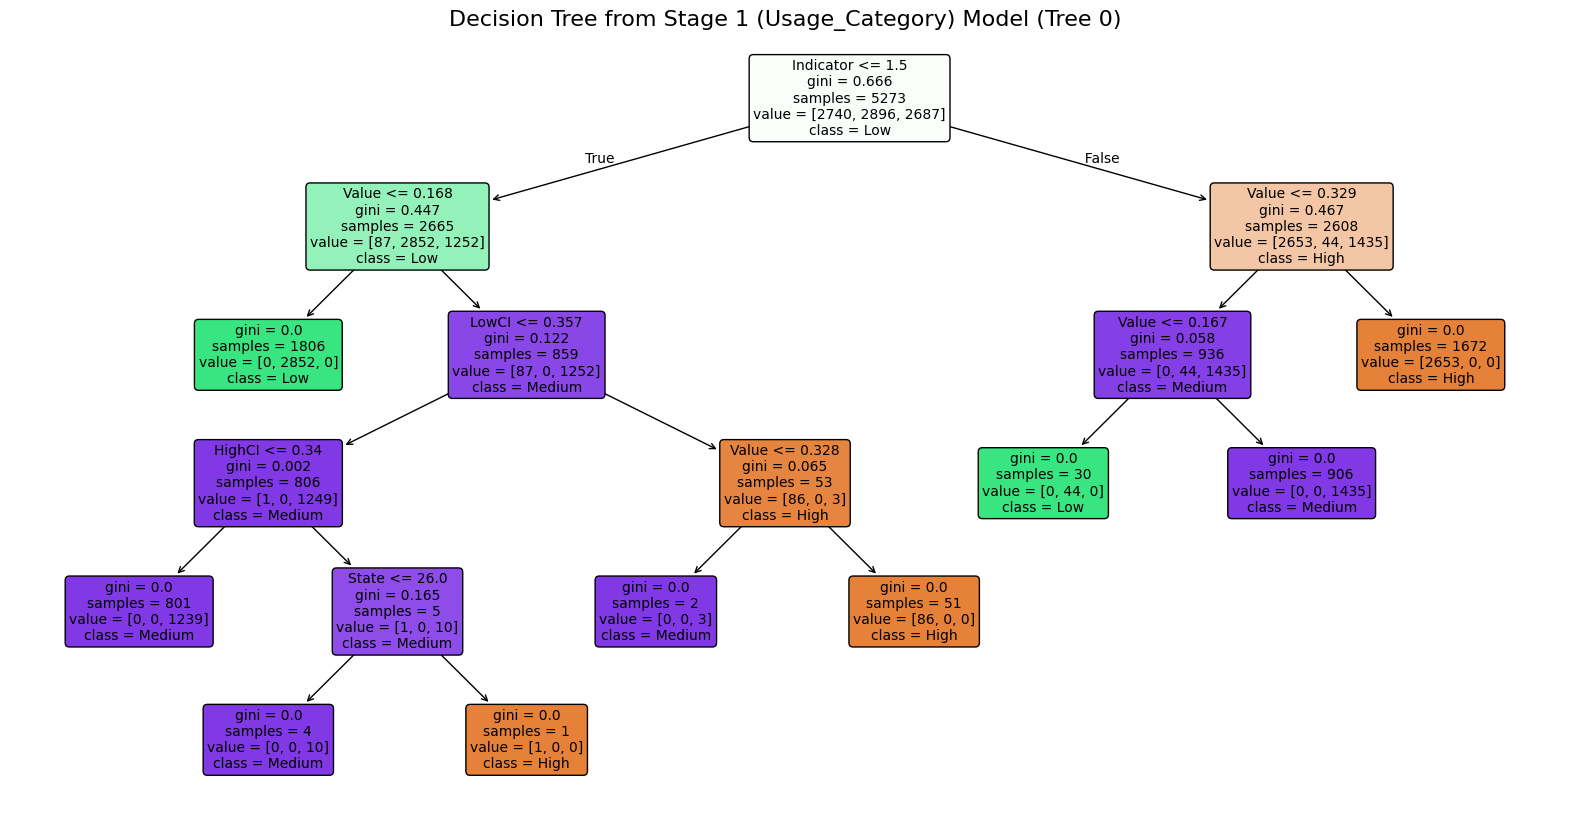

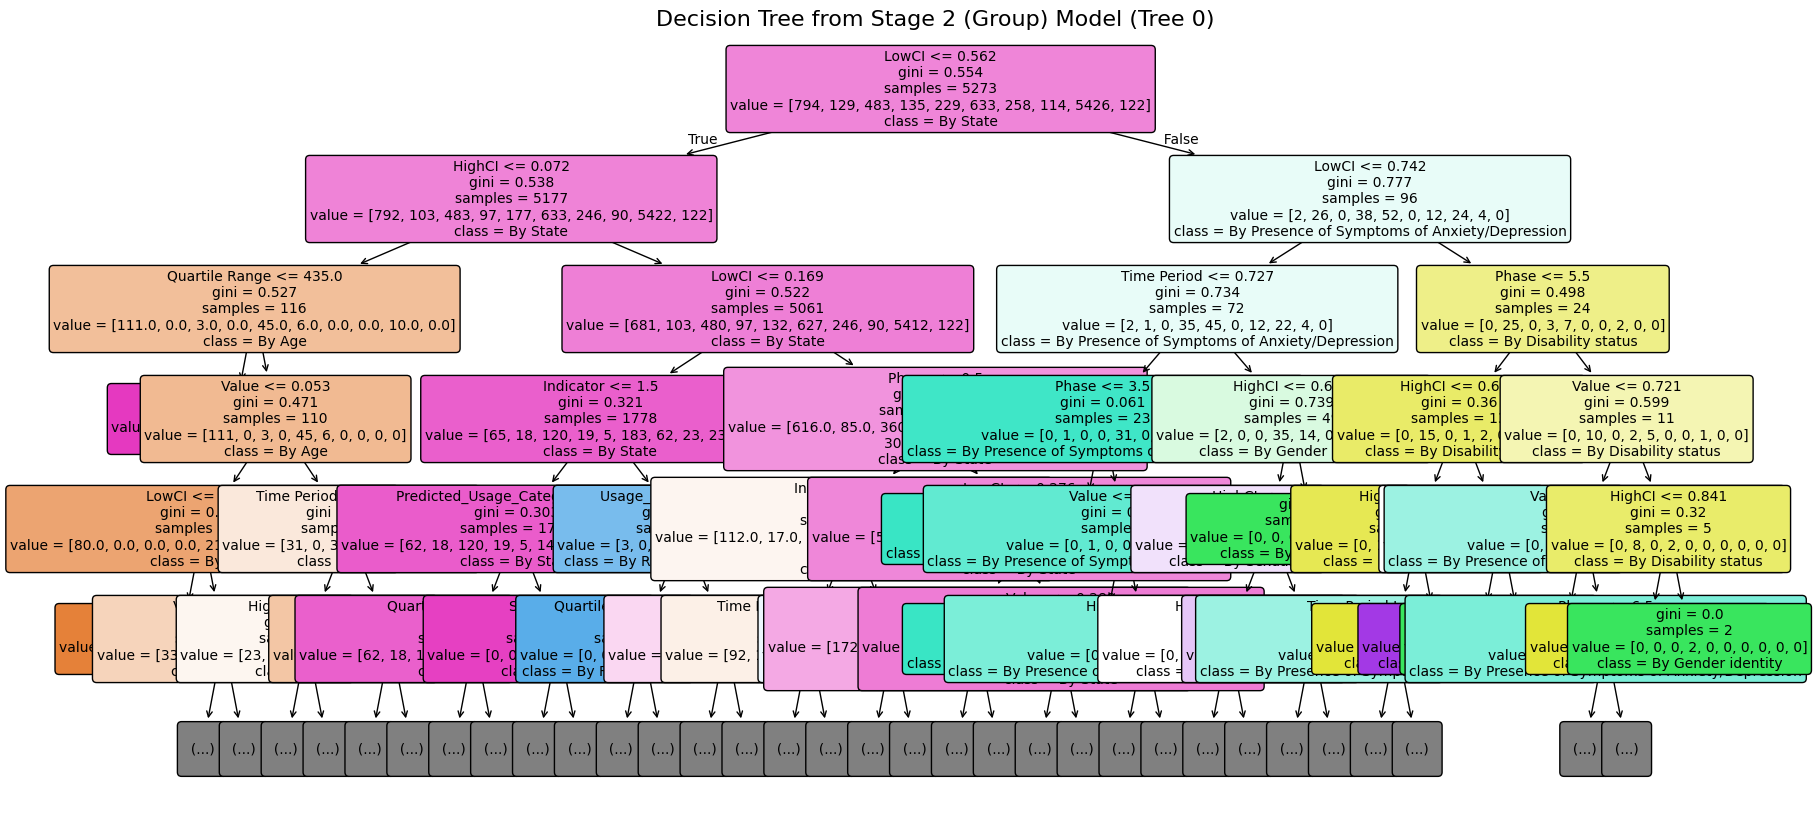

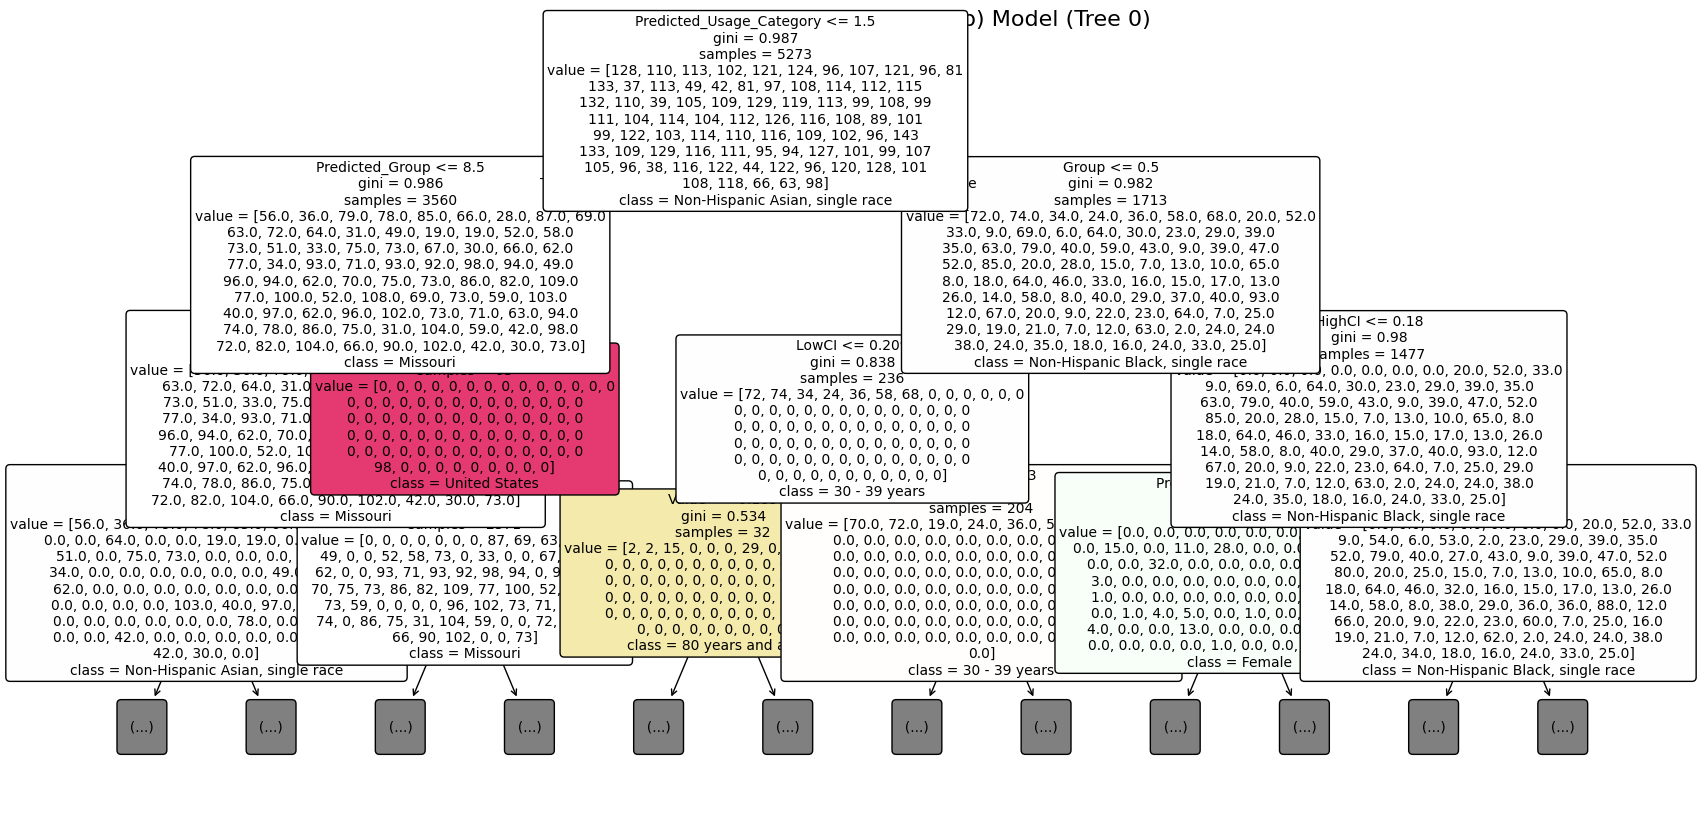

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

def plot_tree_with_matplotlib(forest_model, feature_names, class_names, tree_index=0, stage_name="stage", max_depth=None):
    # Extracting a single tree
    estimator = forest_model.estimators_[tree_index]

    # Plot the tree
    plt.figure(figsize=(20, 10))
    plot_tree(
        estimator,
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        rounded=True,
        fontsize=10,
        max_depth=max_depth

    )
    plt.title(f"Decision Tree from {stage_name} Model (Tree {tree_index})", fontsize=16)
    plt.show()

# Stage 1 Tree
plot_tree_with_matplotlib(
    rf_stage1,
    max_depth=None,
    feature_names=X_stage1.columns.tolist(),
    class_names=label_encoders['Usage_Category'].classes_,
    stage_name="Stage 1 (Usage_Category)"

)

# Stage 2 Tree
plot_tree_with_matplotlib(
    rf_stage2,
    max_depth=5,
    feature_names=X_stage2.columns.tolist(),
    class_names=label_encoders['Group'].classes_,
    stage_name="Stage 2 (Group)"

)

# Stage 3 Tree
plot_tree_with_matplotlib(
    rf_stage3,
    max_depth=3,
    feature_names=X_stage3.columns.tolist(),
    class_names=label_encoders['Subgroup'].classes_,
    stage_name="Stage 3 (Subgroup)"

)


Applying Grid Search CV for hypertunning the model to find the best parameters to model

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defined hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Applied GridSearchCV to Stage 1
grid_search_stage1 = GridSearchCV(estimator=rf_stage1, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_stage1.fit(X_train1, y_train1)

print("Best Parameters for Stage 1 (Usage_Category):", grid_search_stage1.best_params_)

# Applied GridSearchCV to Stage 2
grid_search_stage2 = GridSearchCV(estimator=rf_stage2, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_stage2.fit(X_train2, y_train2)

print("Best Parameters for Stage 2 (Group):", grid_search_stage2.best_params_)

# Applied GridSearchCV to Stage 3
grid_search_stage3 = GridSearchCV(estimator=rf_stage3, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_stage3.fit(X_train3, y_train3)

print("Best Parameters for Stage 3 (Subgroup):", grid_search_stage3.best_params_)


Best Parameters for Stage 1 (Usage_Category): {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Parameters for Stage 2 (Group): {'class_weight': 'balanced_subsample', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters for Stage 3 (Subgroup): {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


Get the Cross Validation Score to ensure if model is getting overfit or not

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation on Usage_Category
cross_val_scores_stage1 = cross_val_score(rf_stage1, X_stage1, y_stage1, cv=5, scoring='accuracy')
print("Stage 1 (Usage_Category) Cross-Validation Accuracy:", np.mean(cross_val_scores_stage1))

# Cross-validation on Group
cross_val_scores_stage2 = cross_val_score(rf_stage2, X_stage2, y_stage2, cv=5, scoring='accuracy')
print("Stage 2 (Group) Cross-Validation Accuracy:", np.mean(cross_val_scores_stage2))

# Cross-validation on Subgroup
cross_val_scores_stage3 = cross_val_score(rf_stage3, X_stage3, y_stage3, cv=5, scoring='accuracy')
print("Stage 3 (Subgroup) Cross-Validation Accuracy:", np.mean(cross_val_scores_stage3))


Stage 1 (Usage_Category) Cross-Validation Accuracy: 1.0
Stage 2 (Group) Cross-Validation Accuracy: 0.7835368997893025
Stage 3 (Subgroup) Cross-Validation Accuracy: 0.731444525560936


Again trainning the model with the parameters we get from Grid Search Cv

In [ ]:
# Final Training with Best Hyperparameters
best_rf_stage1 = grid_search_stage1.best_estimator_
best_rf_stage2 = grid_search_stage2.best_estimator_
best_rf_stage3 = grid_search_stage3.best_estimator_

# Stage 1: Train with full data
best_rf_stage1.fit(X_stage1, y_stage1)

# Stage 2: Train using predicted Usage_Category
best_rf_stage2.fit(X_stage2, y_stage2)

# Stage 3: Train with using predicted Usage_Category and Group
best_rf_stage3.fit(X_stage3, y_stage3)


RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=200, random_state=42)

In [ ]:
# Evaluate on Test Set
y_pred_stage1 = best_rf_stage1.predict(X_test1)
y_pred_stage2 = best_rf_stage2.predict(X_test2)
y_pred_stage3 = best_rf_stage3.predict(X_test3)

accuracy1 = accuracy_score(y_test1, y_pred_stage1)
print(f"Accuracy: {accuracy1 * 100:.2f}%")

# Classification Report for each stage
print("Stage 1 (Usage Category) Classification Report:")
print(classification_report(y_test1, y_pred_stage1))



Accuracy: 100.00%
Stage 1 (Usage Category) Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       705
         Low       1.00      1.00      1.00       656
      Medium       1.00      1.00      1.00       720

    accuracy                           1.00      2081
   macro avg       1.00      1.00      1.00      2081
weighted avg       1.00      1.00      1.00      2081



In [ ]:
accuracy2 = accuracy_score(y_test2, y_pred_stage2)
print(f"Accuracy: {accuracy2 * 100:.2f}%")

print("Stage 2 (Group) Classification Report:")
print(classification_report(y_test2, y_pred_stage2))

Accuracy: 95.92%
Stage 2 (Group) Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.95       231
           1       0.52      0.95      0.67        43
           2       0.97      0.86      0.91       121
           3       0.84      0.97      0.90        33
           4       0.84      0.80      0.82        64
           5       0.93      0.89      0.91       146
           6       0.85      0.80      0.82        59
           7       0.80      1.00      0.89        37
           8       1.00      1.00      1.00      1318
           9       1.00      0.83      0.91        29

    accuracy                           0.96      2081
   macro avg       0.88      0.90      0.88      2081
weighted avg       0.97      0.96      0.96      2081



In [ ]:
accuracy3 = accuracy_score(y_test3, y_pred_stage3)
print(f"Accuracy: {accuracy3 * 100:.2f}%")

print("Stage 3 (Subgroup) Classification Report:")
print(classification_report(y_test3, y_pred_stage3))

Accuracy: 94.38%
Stage 3 (Subgroup) Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.79      0.83      0.81        41
           2       0.72      0.77      0.74        30
           3       0.94      0.84      0.89        37
           4       0.89      0.94      0.91        33
           5       0.83      0.86      0.84        28
           6       0.89      0.89      0.89        35
           7       1.00      1.00      1.00        22
           8       1.00      1.00      1.00        22
           9       1.00      1.00      1.00        29
          10       1.00      1.00      1.00        28
          11       0.86      0.86      0.86        28
          12       1.00      1.00      1.00        10
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00         9
          15       0.83      1.00      0.91        10
          16       0.9

Line Graph Plot for test accuracy vs Cross Val accuracy

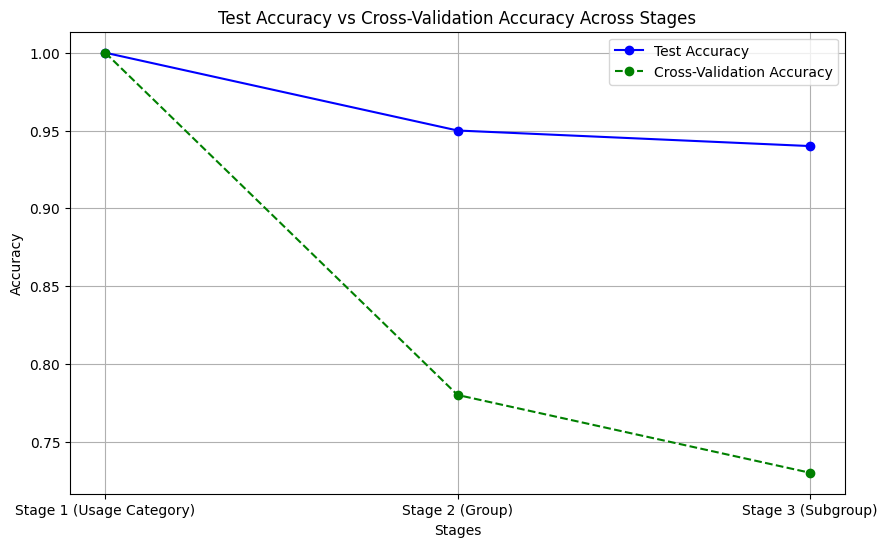

In [ ]:
test_accuracy = [1.0, 0.95, 0.94]
cv_accuracy = [1.0, 0.78, 0.73]

# Stages
stages = ['Stage 1 (Usage Category)', 'Stage 2 (Group)', 'Stage 3 (Subgroup)']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(stages, test_accuracy, marker='o', label='Test Accuracy', linestyle='-', color='blue')
plt.plot(stages, cv_accuracy, marker='o', label='Cross-Validation Accuracy', linestyle='--', color='green')

# Add labels and title
plt.xlabel('Stages')
plt.ylabel('Accuracy')
plt.title('Test Accuracy vs Cross-Validation Accuracy Across Stages')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Applying regularization, SMOTE and Feature Importance to reduce the overfitting as seen in graph above

In [ ]:
# Set hyperparameters for regularization
best_rf_stage1 = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,  # Limiting the depth of trees to prevent overfitting
    min_samples_split=4,  # Minimum samples required to split a node
    min_samples_leaf=2,  # Minimum samples required at a leaf node
    random_state=42
)

best_rf_stage2 = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42
)

best_rf_stage3 = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42
)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Stratified K-Fold Cross Validation for Stage 1, 2, 3
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Stage 1
cv_scores_stage1 = cross_val_score(best_rf_stage1, X_stage1, y_stage1, cv=skf, scoring='accuracy')

# Stage 2
cv_scores_stage2 = cross_val_score(best_rf_stage2, X_stage2, y_stage2, cv=skf, scoring='accuracy')

# Stage 3
cv_scores_stage3 = cross_val_score(best_rf_stage3, X_stage3, y_stage3, cv=skf, scoring='accuracy')

# Print Cross-validation scores
print(f"Stage 1 Cross-Validation Accuracy: {cv_scores_stage1.mean()}")
print(f"Stage 2 Cross-Validation Accuracy: {cv_scores_stage2.mean()}")
print(f"Stage 3 Cross-Validation Accuracy: {cv_scores_stage3.mean()}")


Stage 1 Cross-Validation Accuracy: 1.0
Stage 2 Cross-Validation Accuracy: 0.8080545133626584
Stage 3 Cross-Validation Accuracy: 0.6649342956418882


In [ ]:
from sklearn.feature_selection import SelectFromModel

# Stage 1 Feature Selection
best_rf_stage1.fit(X_stage1, y_stage1)
sfm_stage1 = SelectFromModel(best_rf_stage1, threshold='mean', importance_getter='auto')
X_selected_stage1 = sfm_stage1.transform(X_stage1)

# Stage 2 Feature Selection
best_rf_stage2.fit(X_stage2, y_stage2)
sfm_stage2 = SelectFromModel(best_rf_stage2, threshold='mean', importance_getter='auto')
X_selected_stage2 = sfm_stage2.transform(X_stage2)

# Stage 3 Feature Selection
best_rf_stage3.fit(X_stage3, y_stage3)
sfm_stage3 = SelectFromModel(best_rf_stage3, threshold='mean', importance_getter='auto')
X_selected_stage3 = sfm_stage3.transform(X_stage3)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
from imblearn.over_sampling import SMOTE

# Applied SMOTE to balance the dataset for Stage 1
smote = SMOTE(random_state=42)
X_resampled_stage1, y_resampled_stage1 = smote.fit_resample(X_stage1, y_stage1)

# Applied SMOTE to Stage 2 and Stage 3
X_resampled_stage2, y_resampled_stage2 = smote.fit_resample(X_stage2, y_stage2)
X_resampled_stage3, y_resampled_stage3 = smote.fit_resample(X_stage3, y_stage3)


Trainning the model After Regularization

In [ ]:
# Re-train the models using the updated data
best_rf_stage1.fit(X_resampled_stage1, y_resampled_stage1)
best_rf_stage2.fit(X_resampled_stage2, y_resampled_stage2)
best_rf_stage3.fit(X_resampled_stage3, y_resampled_stage3)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=4,
                       random_state=42)

In [ ]:
y_pred_stage1 = best_rf_stage1.predict(X_test1)
y_pred_stage2 = best_rf_stage2.predict(X_test2)
y_pred_stage3 = best_rf_stage3.predict(X_test3)

In [ ]:
print("Stage 1 (Usage Category) Classification Report:")
print(classification_report(y_test1, y_pred_stage1))

Stage 1 (Usage Category) Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       705
         Low       1.00      1.00      1.00       656
      Medium       1.00      1.00      1.00       720

    accuracy                           1.00      2081
   macro avg       1.00      1.00      1.00      2081
weighted avg       1.00      1.00      1.00      2081



In [ ]:
print("Stage 2 (Group) Classification Report:")
print(classification_report(y_test2, y_pred_stage2))

Stage 2 (Group) Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.50      0.59       231
           1       0.49      0.84      0.62        43
           2       0.54      0.31      0.39       121
           3       0.35      0.88      0.50        33
           4       0.66      0.59      0.62        64
           5       0.66      0.38      0.48       146
           6       0.29      0.44      0.35        59
           7       0.46      0.73      0.56        37
           8       1.00      1.00      1.00      1318
           9       0.22      0.62      0.32        29

    accuracy                           0.82      2081
   macro avg       0.54      0.63      0.54      2081
weighted avg       0.84      0.82      0.82      2081



In [ ]:
print("Stage 3 (Subgroup) Classification Report:")
print(classification_report(y_test3, y_pred_stage3))

Stage 3 (Subgroup) Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.59      0.57        27
           1       0.78      0.76      0.77        41
           2       0.70      0.53      0.60        30
           3       0.77      0.81      0.79        37
           4       0.87      0.82      0.84        33
           5       0.67      0.86      0.75        28
           6       0.91      0.86      0.88        35
           7       1.00      1.00      1.00        22
           8       1.00      1.00      1.00        22
           9       1.00      1.00      1.00        29
          10       1.00      1.00      1.00        28
          11       0.85      0.61      0.71        28
          12       1.00      1.00      1.00        10
          13       1.00      0.95      0.97        19
          14       0.82      1.00      0.90         9
          15       0.83      1.00      0.91        10
          16       0.97      1.00      

In [ ]:
# Cross-validation scores for each stage
print(f"Stage 1 Cross-Validation Accuracy: {cv_scores_stage1.mean()}")
print(f"Stage 2 Cross-Validation Accuracy: {cv_scores_stage2.mean()}")
print(f"Stage 3 Cross-Validation Accuracy: {cv_scores_stage3.mean()}")

Stage 1 Cross-Validation Accuracy: 1.0
Stage 2 Cross-Validation Accuracy: 0.8080545133626584
Stage 3 Cross-Validation Accuracy: 0.6649342956418882


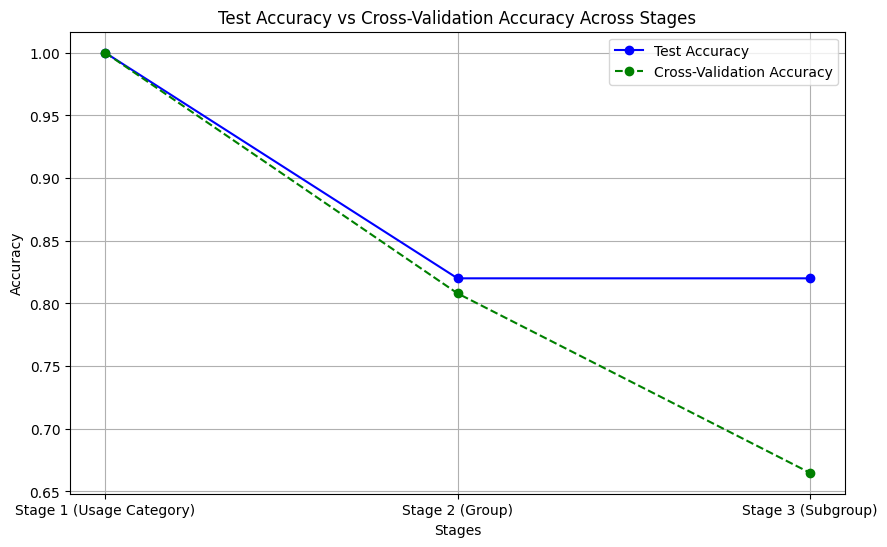

In [ ]:
test_accuracy = [1.0, 0.82, 0.82]  # Test accuracy for Stage 1, 2, 3
cv_accuracy = [1.0, 0.8080, 0.6649]  # Cross-validation accuracy for Stage 1, 2, 3

# Stages
stages = ['Stage 1 (Usage Category)', 'Stage 2 (Group)', 'Stage 3 (Subgroup)']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(stages, test_accuracy, marker='o', label='Test Accuracy', linestyle='-', color='blue')
plt.plot(stages, cv_accuracy, marker='o', label='Cross-Validation Accuracy', linestyle='--', color='green')

# Add labels and title
plt.xlabel('Stages')
plt.ylabel('Accuracy')
plt.title('Test Accuracy vs Cross-Validation Accuracy Across Stages')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()